# Listing 3-1 Illustate 2D convolution of Images through a Toy example

In [1]:
## Illustate 2D convolution of Images through a Toy example

import scipy.signal
import numpy as np

# Take a 7x7 image as example

image = np.array([[1, 2, 3, 4, 5, 6, 7],
                 [8, 9, 10, 11, 12, 13, 14],
                 [15, 16, 17, 18, 19, 20, 21],
                 [22, 23, 24, 25, 26, 27, 28],
                 [29, 30, 31, 32, 33, 34, 35],
                 [36, 37, 38, 39, 40, 41, 42],
                 [43, 44, 45, 46, 47, 48, 49]])

# Defined an image processing kernel

filter_kernel = np.array([[-1, 1, -1],
                          [-2, 3, 1],
                          [2, -4, 0]])

# Convolve the image with the filter kernel through scipy 2D convolution to produce an output image of same dimension as that of the input

I = scipy.signal.convolve2d(image, filter_kernel,mode='same', boundary='fill', fillvalue=0)
print 'Scipy convolve2d output'
print(I)

# We replicate the same logic of a Scipy 2D convolution by following the below steps
# a) The boundaries need to be extended in both directions for the image and padded with zeroes.
#    For convolving the 7x7 image by 3x3 kernel the dimensions needs to be extended by (3-1)/2 i.e 1
#    on either size for each dimension. So a skeleton image of 9x9 image would be created
#    in which the boundaries of 1 pixel are pre-filled with zero.
# b) The kernel needs to be flipped i.e rotated by 180 degrees
# c) The flipped kernel needs to placed at each cordinate location for the image and then the sum of
#    cordinatewise product with the image intensities need to be computed. These sum for each co-ordinate would give
#    the intensities for the output image.

row,col=7,7

## Rotate the filter kernel twice by 90 degree to get 180 rotation

filter_kernel_flipped = np.rot90(filter_kernel,2)

## Pad the boundaries of the image with zeroes and fill the rest from the original image

image1 = np.zeros((9,9))

for i in xrange(row):
    for j in xrange(col):
        image1[i+1,j+1] = image[i,j]

#print(image1)

## Define the output image

image_out = np.zeros((row,col))

## Dynamic shifting of the flipped filter at each image cordinate and then computing the convolved sum.

for i in xrange(1,1+row):
    for j in xrange(1,1+col):
        arr_chunk = np.zeros((3,3))
        for k,k1 in zip(xrange(i-1,i+2),xrange(3)):
            for l,l1 in zip(xrange(j-1,j+2),xrange(3)):
                arr_chunk[k1,l1] = image1[k,l]

        image_out[i-1,j-1] = np.sum(np.multiply(arr_chunk,filter_kernel_flipped))
print "2D convolution implementation"
print(image_out) 

Scipy convolve2d output
[[ -2  -8  -7  -6  -5  -4  28]
 [  5  -3  -4  -5  -6  -7  28]
 [ -2 -10 -11 -12 -13 -14  28]
 [ -9 -17 -18 -19 -20 -21  28]
 [-16 -24 -25 -26 -27 -28  28]
 [-23 -31 -32 -33 -34 -35  28]
 [-29  13  13  13  13  13  27]]
2D convolution implementation
[[ -2.  -8.  -7.  -6.  -5.  -4.  28.]
 [  5.  -3.  -4.  -5.  -6.  -7.  28.]
 [ -2. -10. -11. -12. -13. -14.  28.]
 [ -9. -17. -18. -19. -20. -21.  28.]
 [-16. -24. -25. -26. -27. -28.  28.]
 [-23. -31. -32. -33. -34. -35.  28.]
 [-29.  13.  13.  13.  13.  13.  27.]]


# Listing 3-2 Convolution of an Image with Mean filter 

Image after applying Gaussian Noise


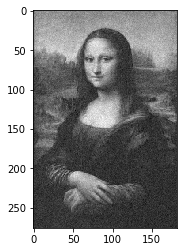

In [12]:
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

img = cv2.imread('monalisa.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
mean = 0
var = 100
sigma = var**0.5
row,col = np.shape(gray)
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
gray_noisy = gray + gauss
print "Image after applying Gaussian Noise"
plt.imshow(gray_noisy,cmap='gray')


Image after convolving with Mean filter


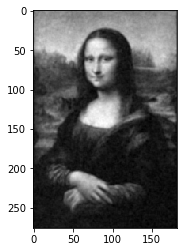

In [21]:
## Mean filter
Hm = np.array([[1,1,1],[1,1,1],[1,1,1]])/float(9)
Gm = convolve2d(gray_noisy,Hm,mode='same')
plt.imshow(Gm,cmap='gray') 
print "Image after convolving with Mean filter"

# Listing 3-3. Median Filter illustration

Image after applying Salt and Pepper Noise


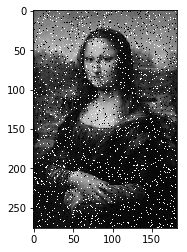

In [22]:
#----------------------------------------------------------------------------------------
## First create an image with Salt and Pepper Noise 
#----------------------------------------------------------------------------------------
## Generate random integers from 0 to 20
## If the value is zero we will replace the image pixel with a low value of 0 that corresponds to a black pixel
## If the value is 20 we will replace the image pixel with a high value of 255 that correspondsa to a white pixel
## Since we have taken 20 intergers and out of which we will only tag integers 1 and 20 as salt and pepper noise
## hence we would have approximately 10% of the overall pixels as salt and pepper noise. If we want to reduce it
## to 5 % we can taken integers from 0 to 40 and then treat 0 as indicator for black pixel and 40 as an indicator for white pixel.

np.random.seed(0)

gray_sp = gray*1
sp_indices = np.random.randint(0,21,[row,col])

for i in xrange(row):
    for j in xrange(col):
        if sp_indices[i,j] == 0:
            gray_sp[i,j] = 0
        if sp_indices[i,j] == 20:
            gray_sp[i,j] = 255
plt.imshow(gray_sp,cmap='gray')
print "Image after applying Salt and Pepper Noise"






Removing Salt and Pepper Noise with OpenCV Median Filter


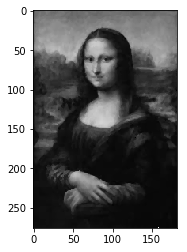

In [23]:
#-----------------------------------------------------------------------------------------------------------
# Remove the Salt and Pepper Noise 
#-----------------------------------------------------------------------------------------------------------
## Now we want to remove the salt and pepper noise through a median filter.
## Using the opencv Median Filter for the same

gray_sp_removed = cv2.medianBlur(gray_sp,3)
plt.imshow(gray_sp_removed,cmap='gray')
print"Removing Salt and Pepper Noise with OpenCV Median Filter"


Image produced by applying Median Filter Logic


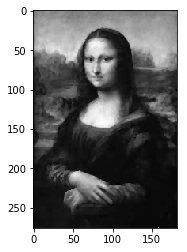

In [25]:
##Implementation of the 3x3 Median Filter without using opencv

gray_sp_removed_exp = gray*1

for i in xrange(row):
    for j in xrange(col):
        local_arr = []
        for k in xrange(np.max([0,i-1]),np.min([i+2,row])):
            for l in xrange(np.max([0,j-1]),np.min([j+2,col])):
                local_arr.append(gray_sp[k,l])

        gray_sp_removed_exp[i,j] = np.median(local_arr)
plt.imshow(gray_sp_removed_exp,cmap='gray')
print "Image produced by applying Median Filter Logic"        


# Listing 3-4. Illustration of the Guassian Filter

Gaussian Blur Filter


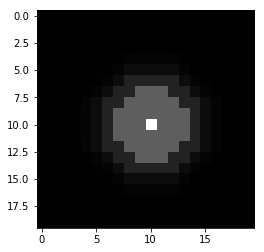

In [26]:
# Creating the Gaussian Filter 
Hg = np.zeros((20,20))

for i in xrange(20):
    for j in xrange(20):
        Hg[i,j] = np.exp(-((i-10)**2 + (j-10)**2)/10)

plt.imshow(Hg,cmap='gray')
print "Gaussian Blur Filter"


Image after convolving with  Gaussiab Blur Filter Created above


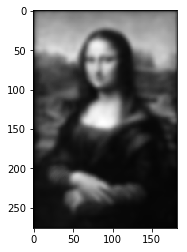

In [27]:
gray_blur = convolve2d(gray,Hg,mode='same')
plt.imshow(gray_blur,cmap='gray')
print "Image after convolving with  Gaussiab Blur Filter Created above"


Figh Frequency Component of Image


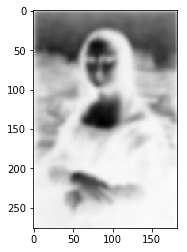

In [30]:
gray_high = gray - gray_blur
plt.imshow(gray_high,cmap='gray')
print "Figh Frequency Component of Image"


Enhanced Image with some portion of High Frequency Component added


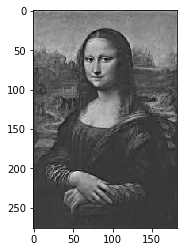

In [31]:
gray_enhanced = gray + 0.025*gray_high
plt.imshow(gray_enhanced,cmap='gray')
print "Enhanced Image with some portion of High Frequency Component added"

# Listing 3-5 Convolution using a Sobel Filter

Image after convolving with Horizontal Sobel Filter


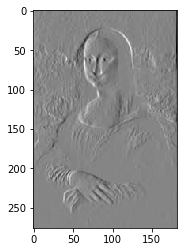

In [32]:
Hx = np.array([[ 1,0, -1],[2,0,-2],[1,0,-1]],dtype=np.float32)
Gx = convolve2d(gray,Hx,mode='same')
plt.imshow(Gx,cmap='gray')
print "Image after convolving with Horizontal Sobel Filter"

Image after convolving with Vertical Sobel Filter


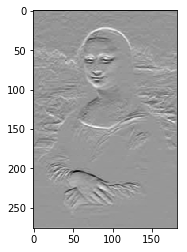

In [33]:
Hy = np.array([[ -1,-2, -1],[0,0,0],[1,2,1]],dtype=np.float32)
Gy = convolve2d(gray,Hy,mode='same')
plt.imshow(Gy,cmap='gray')
print "Image after convolving with Vertical Sobel Filter"

Image after combining outputs from both Horizontal and Vertical Sobel Filters


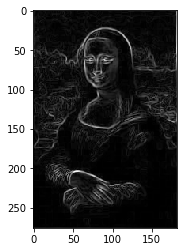

In [34]:
G = (Gx*Gx + Gy*Gy)**0.5
plt.imshow(G,cmap='gray')
print 'Image after combining outputs from both Horizontal and Vertical Sobel Filters'

# Listing 3-6 Convolutional Neural Network for Digit Recognition on the MNIST dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'cost=', '220803.796875000', 'Training accuracy', '0.28125')
('Epoch:', '0001', 'cost=', '257963.203125000', 'Training accuracy', '0.39844')
('Epoch:', '0001', 'cost=', '212230.953125000', 'Training accuracy', '0.37891')
('Epoch:', '0001', 'cost=', '115559.937500000', 'Training accuracy', '0.52344')
('Epoch:', '0001', 'cost=', '89197.757812500', 'Training accuracy', '0.58984')
('Epoch:', '0001', 'cost=', '78908.078125000', 'Training accuracy', '0.50391')
('Epoch:', '0001', 'cost=', '45657.597656250', 'Training accuracy', '0.56641')
('Epoch:', '0001', 'cost=', '36068.417968750', 'Training accuracy', '0.63672')
('Epoch:', '0001', 'cost=', '16053.542968750', 'Training accuracy', '0.76172')
('Epoch:', '0001', 'cost=', '17624.994140625', 'Training accuracy', '0.59375')
('Epoch:', '

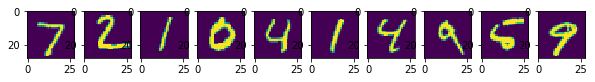

In [6]:
##################################################
##Import the required libraries and read the MNIST dataset
##################################################
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import time
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

###########################################
## Set the value of the Parameters
###########################################

learning_rate = 0.01
epochs = 20
batch_size = 256
num_batches = mnist.train.num_examples/batch_size
input_height = 28
input_width = 28
n_classes = 10
dropout = 0.75
display_step = 1
filter_height = 5
filter_width = 5
depth_in = 1
depth_out1 = 64
depth_out2 = 128



###########################################
# input output definition
###########################################
x = tf.placeholder(tf.float32,[None,28*28])
y = tf.placeholder(tf.float32,[None,n_classes])
keep_prob = tf.placeholder(tf.float32)
###########################################
## Store the weights
## Number of weights of filters to be learnt in 'wc1' => filter_height*filter_width*depth_in*depth_out1
## Number of weights of filters to be learnt in 'wc1' => filter_height*filter_width*depth_out1*depth_out2
## No of Connections to the fully Connected layer => Each maxpooling operation reduces the image size to 1/4.
## So two maxpooling reduces the imase size to /16. There are depth_out2 number of images each of size 1/16 ## of the original image size of input_height*input_width. So there is total of
## (1/16)*input_height* input_width* depth_out2 pixel outputs which when connected to the fully connected layer ## with 1024 units would provide (1/16)*input_height* input_width* depth_out2*1024 connections.
###########################################
weights = {
'wc1' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_in,depth_out1])),
'wc2' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_out1,depth_out2])),
'wd1' : tf.Variable(tf.random_normal([(input_height/4)*(input_height/4)* depth_out2,1024])),
'out' : tf.Variable(tf.random_normal([1024,n_classes]))
}
#################################################
## In the 1st Convolutional Layer there are 64 feature maps and that corresponds to 64 biases in 'bc1'
## In the 2nd Convolutional Layer there are 64 feature maps and that corresponds to 128 biases in 'bc2'
## In the Fully Connected Layer there are 1024units and that corresponds to 1024 biases in 'bd1'
## In the output layet there are 10 classes for the Softmax and that corresponds to 10 biases in 'out'
#################################################
biases = {
'bc1' : tf.Variable(tf.random_normal([64])),
'bc2' : tf.Variable(tf.random_normal([128])),
'bd1' : tf.Variable(tf.random_normal([1024])),
'out' : tf.Variable(tf.random_normal([n_classes]))
}


##################################################
## Create the different layers
##################################################

'''C O N V O L U T I O N L A Y E R'''
def conv2d(x,W,b,strides=1):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

''' P O O L I N G L A Y E R'''
def maxpool2d(x,stride=2):
    return tf.nn.max_pool(x,ksize=[1,stride,stride,1],strides=[1,stride,stride,1],padding='SAME')
##################################################
## Create the feed forward model
##################################################
def conv_net(x,weights,biases,dropout):
##################################################
## Reshape the input in the 4 dimensional image
## 1st dimension - image index
## 2nd dimension - height
## 3rd dimension - width
## 4th dimension - depth
    x = tf.reshape(x,shape=[-1,28,28,1])
##################################################
## Convolutional layer 1
    conv1 = conv2d(x,weights['wc1'],biases['bc1'])
    conv1 = maxpool2d(conv1,2)
## Convolutional layer 2
    conv2 = conv2d(conv1,weights['wc2'],biases['bc2'])
    conv2 = maxpool2d(conv2,2)
## Now comes the fully connected layer
    fc1 = tf.reshape(conv2,[-1,weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
## Apply Dropout
    fc1 = tf.nn.dropout(fc1,dropout)
## Output class prediction
    out = tf.add(tf.matmul(fc1,weights['out']),biases['out'])
    return out


#######################################################
# Defining the tensorflow Ops for different activities
#######################################################
pred = conv_net(x,weights,biases,keep_prob)
# Define loss function and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
## initializing all variables
init = tf.global_variables_initializer()
####################################################
## Launch the execution Graph
####################################################
start_time = time.time()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(num_batches):
            
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
            loss,acc = sess.run([cost,accuracy],feed_dict={x:batch_x,y:batch_y,keep_prob: 1.})
            if epochs % display_step == 0:
                print("Epoch:", '%04d' % (i+1),
                "cost=", "{:.9f}".format(loss),
                "Training accuracy","{:.5f}".format(acc))
    print('Optimization Completed')

    y1 = sess.run(pred,feed_dict={x:mnist.test.images[:256],keep_prob: 1})
    test_classes = np.argmax(y1,1)
    print('Testing Accuracy:',sess.run(accuracy,feed_dict={x:mnist.test.images[:256],y:mnist.test.labels[:256],keep_prob: 1}))
    f, a = plt.subplots(1, 10, figsize=(10, 2))

    for i in range(10):
        a[i].imshow(np.reshape(mnist.test.images[i],(28, 28)))
        print test_classes[i]

end_time = time.time()
print('Total processing time:',end_time - start_time)

# Listing 3-7 Real World use of Convolutional Neural Network

In [ ]:
########################################################

## Load the relevant libraries
## Download the data from https://www.kaggle.com/c/intel-mobileodt-cervical-cancer-screening

######################################################## 
from PIL import ImageFilter, ImageStat, Image, ImageDraw
from multiprocessing import Pool, cpu_count
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import glob
import cv2
import time
from keras.utils import np_utils
import os 
import tensorflow as tf

def get_im_cv2(path):
    img = cv2.imread(path)
    resized = cv2.resize(img, (64,64), cv2.INTER_LINEAR)
    return resized


def load_train():
    X_train = []
    X_train_id = []
    y_train = []
    start_time = time.time()

    print('Read train images')
    folders = ['Type_1', 'Type_2', 'Type_3']
    for fld in folders:
        index = folders.index(fld)
        print('Load folder {} (Index: {})'.format(fld, index))
        #path = os.path.join('.', 'Downloads', 'Intel','train', fld, '*.jpg')
        path = os.path.join('/media', 'santanu','9eb9b6dc-b380-486e-b4fd-c424a325b976','Kaggle Competitions','Intel','train', fld, '*.jpg')
        files = glob.glob(path)
        
        for fl in files:
            flbase = os.path.basename(fl)
            img = get_im_cv2(fl)
            X_train.append(img)
            X_train_id.append(flbase)
            y_train.append(index)
            
    for fld in folders:
        index = folders.index(fld)
        print('Load folder {} (Index: {})'.format(fld, index))
        path = os.path.join('/media', 'santanu','9eb9b6dc-b380-486e-b4fd-c424a325b976','Kaggle Competitions','Intel','Additional', fld, '*.jpg')
        files = glob.glob(path)
        
        for fl in files:
            flbase = os.path.basename(fl)
            #print fl
            img = get_im_cv2(fl)
            X_train.append(img)
            X_train_id.append(flbase)
            y_train.append(index)

    print('Read train data time: {} seconds'.format(round(time.time() - start_time, 2)))
    return X_train, y_train, X_train_id


def load_test():
    path = os.path.join('/media', 'santanu','9eb9b6dc-b380-486e-b4fd-c424a325b976','Kaggle Competitions','Intel','test', fld, '*.jpg')
    files = sorted(glob.glob(path))

    X_test = []
    X_test_id = []
    for fl in files:
        flbase = os.path.basename(fl)
        img = get_im_cv2(fl)
        X_test.append(img)
        X_test_id.append(flbase)
    path = os.path.join('/media', 'santanu','9eb9b6dc-b380-486e-b4fd-c424a325b976','Kaggle Competitions','Intel','stg2', fld, '*.jpg')
    files = sorted(glob.glob(path))
    for fl in files:
        flbase = os.path.basename(fl)
        img = get_im_cv2(fl)
        X_test.append(img)
        X_test_id.append(flbase)
    
    return X_test, X_test_id



def read_and_normalize_train_data():
    train_data, train_target, train_id = load_train()

    print('Convert to numpy...')
    train_data = np.array(train_data, dtype=np.uint8)
    train_target = np.array(train_target, dtype=np.uint8)

    print('Reshape...')
    train_data = train_data.transpose((0, 2,3, 1))
    train_data = train_data.transpose((0, 1,3, 2))

    print('Convert to float...')
    train_data = train_data.astype('float32')
    train_data = train_data / 255
    train_target = np_utils.to_categorical(train_target, 3)

    print('Train shape:', train_data.shape)
    print(train_data.shape[0], 'train samples')
    return train_data, train_target, train_id


def read_and_normalize_test_data():
    start_time = time.time()
    test_data, test_id = load_test()

    test_data = np.array(test_data, dtype=np.uint8)
    test_data = test_data.transpose((0,2,3,1))
    train_data = test_data.transpose((0, 1,3, 2))

    test_data = test_data.astype('float32')
    test_data = test_data / 255

    print('Test shape:', test_data.shape)
    print(test_data.shape[0], 'test samples')
    print('Read and process test data time: {} seconds'.format(round(time.time() - start_time, 2)))
    return test_data, test_id

##########################################################
## Read and Normalalize the train data
########################################################## 

#train_data, train_target, train_id = read_and_normalize_train_data()

##########################################################
## Shuffle the input training data to aid Stochastic gradient descent
########################################################## 
from random import shuffle
# Given list1 and list2
list1_shuf = []
list2_shuf = []
index_shuf = range(len(train_data))
shuffle(index_shuf)
for i in index_shuf:
    list1_shuf.append(train_data[i,:,:,:])
    list2_shuf.append(train_target[i,])
list1_shuf = np.array(list1_shuf,dtype=np.uint8)
list2_shuf = np.array(list2_shuf,dtype=np.uint8)

##########################################################
## TensorFlow activities for Network Definition and Training
##########################################################
## Create the different layers 



## Create  the different layers

channel_in = 3 
channel_out = 64
channel_out1 = 128

'''C O N V O L U T I O N    L A Y E R'''
def conv2d(x,W,b,strides=1):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)


''' P O O L I N G  L A Y E R'''
def maxpool2d(x,stride=2):
    return tf.nn.max_pool(x,ksize=[1,stride,stride,1],strides=[1,stride,stride,1],padding='SAME')

## Create the final model 

def conv_net(x,weights,biases,dropout):
    
    ## Convolutional 1
    conv1 = conv2d(x,weights['wc1'],biases['bc1'])
    conv1 = maxpool2d(conv1,stride=2)
    ## Convolutional 2
    conv2 = conv2d(conv1,weights['wc2'],biases['bc2'])
    conv2 = maxpool2d(conv2,stride=2)
    ## Convolutional 3
    conv3 = conv2d(conv2,weights['wc3'],biases['bc3'])
    conv3 = maxpool2d(conv3,stride=2)
    ## Fully connected layer
        
    fc1 = tf.reshape(conv3,[-1,weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    ## Apply Dropout 
    fc1 = tf.nn.dropout(fc1,dropout)
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    ## Apply Dropout 
    fc2 = tf.nn.dropout(fc2,dropout)
    
    ## Output class prediction 
    
    out = tf.add(tf.matmul(fc2,weights['out']),biases['out'])
    return out 

######################################################
## Define several Parameters for the Network and learning
####################################################### 

start_time = time.time()
learning_rate = 0.01
epochs = 200
batch_size = 128
num_batches = list1_shuf.shape[0]/128
input_height = 64 
input_width = 64
n_classes = 3
dropout = 0.5
display_step = 1
filter_height = 3
filter_width = 3
depth_in = 3
depth_out1 = 64
depth_out2 = 128
depth_out3 = 256


# input output definitition 
x = tf.placeholder(tf.float32,[None,input_height,input_width,depth_in])
y = tf.placeholder(tf.float32,[None,n_classes])
keep_prob = tf.placeholder(tf.float32)

## Store the weights

weights = { 
    'wc1' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_in,depth_out1])),
    'wc2' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_out1,depth_out2])),
    'wc3' : tf.Variable(tf.random_normal([filter_height,filter_width,depth_out2,depth_out3])),
    'wd1' : tf.Variable(tf.random_normal([(input_height/8)*(input_height/8)*256,512])),
    'wd2' : tf.Variable(tf.random_normal([512,512])),
    'out' : tf.Variable(tf.random_normal([512,n_classes]))

}

biases = { 
    'bc1' : tf.Variable(tf.random_normal([64])),
    'bc2' : tf.Variable(tf.random_normal([128])),
    'bc3' : tf.Variable(tf.random_normal([256])),
    'bd1' : tf.Variable(tf.random_normal([512])),
    'bd2' : tf.Variable(tf.random_normal([512])),
    'out' : tf.Variable(tf.random_normal([n_classes]))

}

# the model 

pred = conv_net(x,weights,biases,keep_prob)

# Define loss function and optimizer 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model 

correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))



## initializing all variables

init = tf.global_variables_initializer()

## Launch the execution Graph
start_time = time.time()
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epochs):
        
        for j in range(num_batches):
            
            batch_x,batch_y = list1_shuf[i*(batch_size):(i+1)*(batch_size)],list2_shuf[i*(batch_size):(i+1)*(batch_size)]
            sess.run(optimizer, feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
            loss,acc = sess.run([cost,accuracy],feed_dict={x:batch_x,y:batch_y,keep_prob: 1.})
            
        
        if epochs % display_step == 0:
            print("Epoch:", '%04d' % (i+1),
                  "cost=", "{:.9f}".format(loss),
                  "Training accuracy","{:.5f}".format(acc))
            
            
    print('Optimization Completed')
   
          
end_time = time.time()
print('Total processing time:',end_time - start_time)




('Epoch:', '0001', 'cost=', '44.052845001', 'Training accuracy', '0.76562')
('Epoch:', '0002', 'cost=', '79.976043701', 'Training accuracy', '0.75781')
('Epoch:', '0003', 'cost=', '2.502193451', 'Training accuracy', '0.50781')
('Epoch:', '0004', 'cost=', '1.924536705', 'Training accuracy', '0.60938')
('Epoch:', '0005', 'cost=', '1.143020630', 'Training accuracy', '0.50000')
('Epoch:', '0006', 'cost=', '1.013695598', 'Training accuracy', '0.50781')
('Epoch:', '0007', 'cost=', '0.985447764', 'Training accuracy', '0.53906')
('Epoch:', '0008', 'cost=', '0.996825457', 'Training accuracy', '0.47656')
('Epoch:', '0009', 'cost=', '0.939876914', 'Training accuracy', '0.58594')
('Epoch:', '0010', 'cost=', '1.057305217', 'Training accuracy', '0.45312')
('Epoch:', '0011', 'cost=', '1.025760531', 'Training accuracy', '0.46875')
('Epoch:', '0012', 'cost=', '0.935575843', 'Training accuracy', '0.60156')
('Epoch:', '0013', 'cost=', '0.960059047', 'Training accuracy', '0.56250')
('Epoch:', '0014', 'cos

# Listing 3-8 Transfer Learning with Inception V3

# Listing 3-9 Transfer Learning with Pre-trained VGG16 

In [3]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.misc import imresize
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline
sys.path.append("/home/santanu/models/slim")
import cv2
from scipy.misc import imresize
from nets import vgg
from preprocessing import vgg_preprocessing
from mlxtend.preprocessing import shuffle_arrays_unison
checkpoints_dir = '/home/santanu/checkpoints'

slim = tf.contrib.slim

learning_rate = 0.01
batch_size = 32

cat_train = '/home/santanu/CatvsDog/train/cat/'
dog_train = '/home/santanu/CatvsDog/train/dog/'

all_images = os.listdir(cat_train) + os.listdir(dog_train)
train_images, validation_images = train_test_split(all_images, train_size=0.8, test_size=0.2)

MEAN_VALUE = np.array([103.939, 116.779, 123.68])

################################################
# Logic to read the Images and also do mean correction
################################################ 
def image_preprocess(img_path,width,height):
    img = cv2.imread(img_path)
    img = imresize(img,(width,height))
    img = img - MEAN_VALUE
    return(img)

################################################
# Create generator for Image batches so that only the processed 
# batch is in memory
################################################ 
def data_gen_small(images, batch_size, width,height):
        """
        data_dir: where the actual images are kept
        mask_dir: where the actual masks are kept
        images: the filenames of the images we want to generate batches from
        batch_size: self explanatory
        dims: the dimensions in which we want to rescale our images
        """
        while True:
            ix = np.random.choice(np.arange(len(images)), batch_size)
            imgs = []
            labels = []
            for i in ix:
                data_dir = ' '
                # images
                if images[i].split('.')[0] == 'cat':
                    labels.append(1)
                    data_dir = cat_train
                else:
                    if images[i].split('.')[0] == 'dog':
                        labels.append(0)
                        data_dir = dog_train
                #print 'data_dir',data_dir
                img_path = data_dir + images[i]
                array_img = image_preprocess(img_path,width,height)
                imgs.append(array_img)
                
            imgs = np.array(imgs)
            labels = np.array(labels)
            labels = np.reshape(labels,(batch_size,1))
            yield imgs,labels
            
#######################################################
## Defining the generators for training and validation batches
####################################################### 
train_gen = data_gen_small(train_images,batch_size,224,224)
val_gen = data_gen_small(validation_images,batch_size,224,224)


with tf.Graph().as_default():
    
    
    
    x = tf.placeholder(tf.float32,[None,224,224,3])
    y = tf.placeholder(tf.float32,[None,1])
    
    W1 =tf.Variable(tf.random_normal([4096,1],mean=0.0,stddev=0.02),name='W1')
    b1 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.02),name='b1')
    

##############################################
## Load the VGG16 model from slim extract the 
##fully connected layer before the final output layer
###############################################    
    with slim.arg_scope(vgg.vgg_arg_scope()):
        logits, end_points = vgg.vgg_16(x,
                               num_classes=1000,
                               is_training=False)
        fc_7 = end_points['vgg_16/fc7']
        fc_7 = tf.reshape(fc_7, [-1,W1.get_shape().as_list()[0]])
    
    logitx = tf.nn.bias_add(tf.matmul(fc_7,W1),b1)
    probx = tf.nn.sigmoid(logitx)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logitx,labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost,var_list=[W1,b1])
    
##############################################
## Load the VGG16 model from slim extract the fully connected layer
## before the final output layer
###############################################    
        
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
        slim.get_model_variables('vgg_16'))
    
    
    with tf.Session() as sess:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        # Load weights
        init_fn(sess)
        val_x,val_y = next(val_gen)
        for i in xrange(1):
            for j in xrange(50):
                batch_x,batch_y = next(train_gen)
                sess.run(optimizer,feed_dict={x:batch_x,y:batch_y})
                cost_train = sess.run(cost,feed_dict={x:batch_x,y:batch_y})
                cost_val = sess.run(cost,feed_dict={x:val_x,y:val_y})
                prob_out = sess.run(probx,feed_dict={x:val_x,y:val_y})
                print "Training Cost",cost_train,"Validation Cost",cost_val
        out_val = (prob_out > 0.5)*1
        print 'accuracy', np.sum(out_val == val_y)*100/float(len(val_y))

        
       

Training Cost 0.00266041 Validation Cost 0.0284917
Training Cost 0.00242153 Validation Cost 0.0173777
Training Cost 0.00900644 Validation Cost 0.0151344
Training Cost 0.0165917 Validation Cost 0.0134474
Training Cost 0.00340311 Validation Cost 0.0212395
Training Cost 0.0260686 Validation Cost 0.0225615
Training Cost 0.037483 Validation Cost 0.0453141
Training Cost 0.00863258 Validation Cost 0.0664974
Training Cost 0.0058024 Validation Cost 0.0827231
Training Cost 0.298741 Validation Cost 0.058362
Training Cost 0.355128 Validation Cost 0.0433449
Training Cost 0.161569 Validation Cost 0.17669
Training Cost 0.0833164 Validation Cost 0.216218
Training Cost 0.214859 Validation Cost 0.211717
Training Cost 0.776866 Validation Cost 0.120134
Training Cost 0.0369389 Validation Cost 0.0563782
Training Cost 0.00453697 Validation Cost 0.0184853
Training Cost 0.87155 Validation Cost 0.00611667
Training Cost 0.524185 Validation Cost 0.00753975
Training Cost 0.00106114 Validation Cost 0.0107115
Traini

accuracy 96.875
Actual class: Dog Predicted Class: Dog


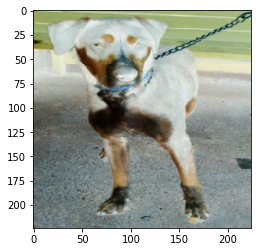

In [11]:
class_dict ={1:"Cat",0:"Dog"}
out_val = (prob_out > 0.5)*1
print 'accuracy', np.sum(out_val == val_y)*100/float(len(val_y))
plt.imshow(val_x[0] + MEAN_VALUE)
print "Actual class:",class_dict[val_y[0][0]],"Predicted Class:",class_dict[out_val[0][0]]

accuracy 96.875
Actual class: Cat Predicted Class: Cat


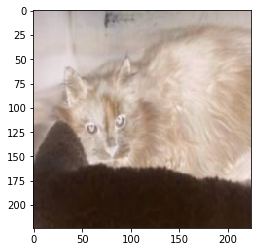

In [10]:
class_dict ={1:"Cat",0:"Dog"}
out_val = (prob_out > 0.5)*1
print 'accuracy', np.sum(out_val == val_y)*100/float(len(val_y))
plt.imshow(val_x[2] + MEAN_VALUE)
print "Actual class:",class_dict[val_y[2][0]],"Predicted Class:",class_dict[out_val[2][0]]